<a href="https://colab.research.google.com/github/upavanu/Datasets-for-Recommneder-Systems/blob/master/Perceptron_Classifier_and_Adaptive_Linear_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Convergence of perceptron is only possible only if two classes are linearly separable and learning rate is sufficiently small.
If two classes can't be linearly separated we will set maxmum number of passes over the training dataset called as **epochs**

In [0]:
class Perceptron(object):
  """ Perceptron Classifier
    parameters
    eta = float - learning rate (0.0 - 1)
    n_iter = int - passes over training dataset
    Attributes
    w_ - 1d array - weights after fitting
    errors_ - list - number of missclassifications in every epoch
  """
  def __init__(self, eta = 0.01, n_iter = 10):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, Y):
    """ Fit training data
      parameters
      X: {array like}, shape = [n_samples,n_features]
      Training Vectors, where n_samples is number of samples, n_features is number of features
      Y: {array like}, shape = [n_samples], where n_samples is target values
      returns
      object
    """
    self.w_ = np.zeros(1+ X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, Y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update 
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    """ Calculate Net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
    """ Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


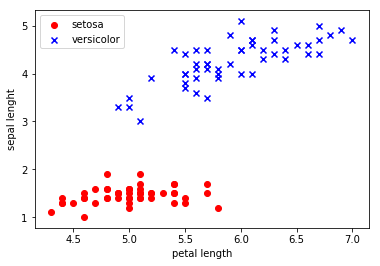

In [9]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
print(df.tail())
y= df.iloc[0:100, 4].values
y= np.where(y== 'Iris-setosa', -1, 1)
x= df.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal lenght')
plt.legend(loc = 'upper left')
plt.show()

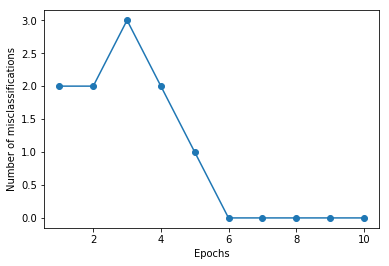

In [10]:
ppn = Perceptron(eta= 0.1, n_iter=10)
ppn.fit(x,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [0]:
def plot_decision_regions(x, y, classifier, resolution=0.02):
  #Setup marker generator and color map
  markers= ('s', 'x', 'o', '^', 'v')
  colors= ('red', 'blue', 'lightgreen', 'grey', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  #plot the decision surface
  x1_min, x1_max = x[:, 0].min()- 1, x[:, 0].max()+ 1
  x2_min, x2_max = x[:, 1].min()- 1, x[:, 1].max()+ 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z= z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha= 0.4, cmap= cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #plot class samples
  for idx, c1 in enumerate(np.unique(y)):
    plt.scatter(x=x[y == c1, 0], y=x[y== c1, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=c1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


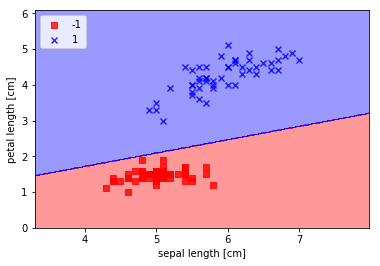

In [12]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc ='upper left')
plt.show()

# Adaptive Linear Neuron

In [0]:
class AdalineGD(object):
  """ Adaptive Linear neuron classifier
    Parameters=
    eta: float - learning rate between 0.0 and 1.0
    n_iter: int - number of iterations over training dataset
    Attributes:
    w_ : 1d-array - weights after fitting 
    errors_ : list - number of misclassification after every epoch
  """
  def __init__(self, eta= 0.01, n_iter= 50):
    self.eta= eta
    self.n_iter= n_iter
  
  def fit(self, X, Y):
    """
      Fit Training data
      Parameters:
      X: {Array-like}, shape= [n-samples, n-features]
      Training Vectors, where n-samples is number of samples and n-features is number of features
      Y: array-like, sharp: [n-samples], Target values 
      Returns:
      self: Object
    """
    self.w_ = np.zeros(1+ X.shape[1])
    self.cost_= []
    for i in range(self.n_iter):
      output= self.net_input(X)
      errors= (Y- output)
      self.w_[1:]+= self.eta+ X.T.dot(errors)
      self.w_[0]+= self.eta* errors.sum()
      cost= (errors**2).sum()/2.0
      self.cost_.append(cost) 
    return self
  def net_input(self, X):
    """Calculate Net input"""
    return np.dot(X, self.w_[1:])+ self.w_[0]
  def activation(self, X):
    """Compute linear activation"""
    return self.net_input(X)
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(X) >= 0.0, 1, -1)

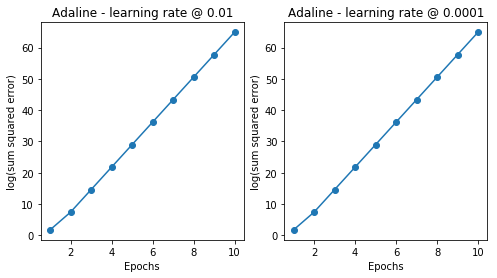

In [14]:
# plotting cost function against the number of epochs for 2 learning rates
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1=AdalineGD(n_iter=10, eta=0.01).fit(x,y)
ax[0].plot(range(1, len(ada1.cost_)+ 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum squared error)')
ax[0].set_title('Adaline - learning rate @ 0.01')
ada2=AdalineGD(n_iter=10, eta=0.0001).fit(x,y)
ax[1].plot(range(1, len(ada2.cost_)+ 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(sum squared error)')
ax[1].set_title('Adaline - learning rate @ 0.0001')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


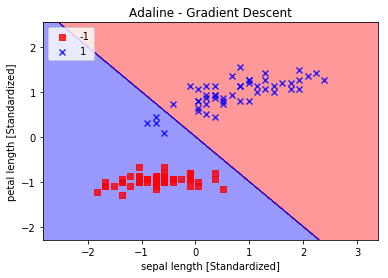

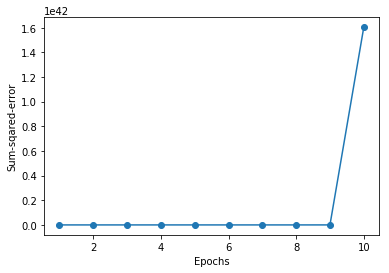

In [15]:
x_std= np.copy(x)
x_std[:, 0]= (x[:, 0]- x[:, 0].mean())/ x[:, 0].std()
x_std[:, 1]= (x[:, 1]- x[:, 1].mean())/ x[:, 1].std()
ada = AdalineGD(n_iter=10, eta=0.01)
ada.fit(x_std, y)
plot_decision_regions(x_std, y, classifier= ada)
plt.title("Adaline - Gradient Descent")
plt.xlabel('sepal length [Standardized]')
plt.ylabel('petal length [Standardized]')
plt.legend(loc= 'upper left')
plt.show()
plt.plot(range(1, len(ada.cost_)+ 1), ada.cost_, marker= 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-sqared-error')
plt.show()

## Large Scale machine learning and stochastic gradient descent

In [0]:
from numpy.random import seed
class AdalineSGD(object):
  """ Adaptive linear Neuron Classifier
      Parameters:
      eta: float - learning rate - (0.0 - 1.0)
      n_iter : int - passes over the training set
      Attributes:
      w_ : 1d array - weights after fitting
      errors_ : list - number of misclassifications in every epoch
      shuffle: bool (default true) - Shuffles training data for every epoch
               If true to prevent cycles
      random_state: int (default None) - Set random state for shuffling and initializing the weights
  """
  def __init__(self, eta= 0.01, n_iter= 10, shuffle= True, random_state= None):
    self.eta= eta
    self.n_iter= n_iter
    self.w_initialized= False
    self.shuffle= shuffle

    if random_state:
      seed(random_state)
  def fit(self, X, Y):
    """
       Fit Training data
       Parameters:
       X: {array-like}, shape= [n_samples, n_features] Training Vectors
       Y: {array-like}, shape=[n_samples] Target values
       Returns: self -object
    """
    self._initialize_weights(X.shape[1])
    self.cost_= []
    for i in range(self.n_iter):
      if self.shuffle:
        X, Y= self._shuffle(X, Y)
      cost= []
      for xi, target in zip(X, Y):
        cost.append(self._update_weights(xi, target))
      avg_cost= sum(cost)/ len(y)
      self.cost_.append(avg_cost)
    return self
  def partial_fit(self, X, Y):
    """fit training data without reinitializing the weights"""
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if Y.ravel().shape[0]> 1:
      for xi, target in zip(X, Y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, Y)
    return self
  def _shuffle(self, X, Y):
    r= np.random.permutation(len(Y))
    return X[r], Y[r]
  def _initialize_weights(self, m):
    """ Initialize weights to zeros"""
    self.w_= np.zeros(1+ m)
    self.w_initialized= True
  def _update_weights(self, xi, target):
    """ Apply Adaline learning rule to update the weights"""
    output= self.net_input(xi)
    error= (target- output)
    self.w_[1:]+= self.eta * xi.dot(error)
    self.w_[0]+= self.eta* error
    cost= 0.5* error**2
    return cost
  def net_input(self, X):
    return np.dot(X, self.w_[1:])+ self.w_[0]
  def activation(self, X):
    """ Compute linear activation"""
    return self.net_input(X)
  def predict(self, X):
    """ return class label after unit step"""
    return np.where(self.activation(X)>= 0.0, 1, -1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


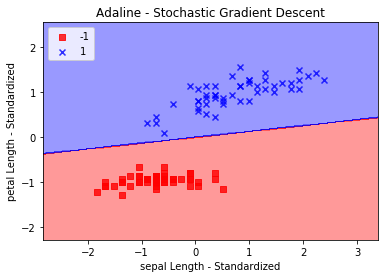

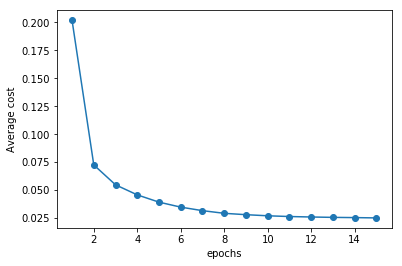

In [27]:
ada= AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(x_std, y)
plot_decision_regions(x_std, y, classifier= ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal Length - Standardized')
plt.ylabel('petal Length - Standardized')
plt.legend(loc= "upper left")
plt.show()
plt.plot(range(1, len(ada.cost_)+ 1), ada.cost_, marker= 'o')
plt.xlabel('epochs')
plt.ylabel('Average cost')
plt.show()